In [ ]:
Simport pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Recruitment_Data_updated.csv')

In [ ]:
df.shape

(107354, 4)

In [ ]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [ ]:
df2=df.drop_duplicates()

In [ ]:
df2.shape

(107354, 4)

In [ ]:
df2.isna().sum()


,0
attrition,0
performance_rating,0
sales_quota_pct,0
recruiting_source,49601


In [ ]:
df2.dropna(inplace=True)

In [ ]:
print('data has {} rows and {} columns'.format(df2.shape[0], df2.shape[1]))

data has 57753 rows and 4 columns


In [ ]:
df2.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
2,-0.009998,2.993355,0.206242,Applied Online
4,-0.025405,3.016559,0.345470,Campus
5,0.011349,2.007761,0.319642,Applied Online
8,-0.019990,2.993574,0.724944,Referral


In [ ]:
df2.nunique()

,0
attrition,57470
performance_rating,57517
sales_quota_pct,57753
recruiting_source,4


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57753 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           57753 non-null  float64
 1   performance_rating  57753 non-null  float64
 2   sales_quota_pct     57753 non-null  float64
 3   recruiting_source   57753 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.2+ MB


In [ ]:
df_ohe=pd.get_dummies(df2,columns=['recruiting_source'])

In [ ]:
df_ohe.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source_Applied Online,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm
0,0.000707,2.976686,0.604739,True,False,False,False
2,-0.009998,2.993355,0.206242,True,False,False,False
4,-0.025405,3.016559,0.345470,False,True,False,False
5,0.011349,2.007761,0.319642,True,False,False,False
8,-0.019990,2.993574,0.724944,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaler=pd.DataFrame(scaler.fit_transform(df_ohe),columns=df_ohe.columns)

In [ ]:
df_scaler

,attrition,performance_rating,sales_quota_pct,recruiting_source_Applied Online,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm
0,-0.519734,0.119714,-0.669794,0.930078,-0.551071,-0.483039,-0.208588
1,-0.545838,0.144117,-1.231629,0.930078,-0.551071,-0.483039,-0.208588
2,-0.583407,0.178084,-1.035334,-1.075178,1.814648,-0.483039,-0.208588
3,-0.493784,-1.298703,-1.071749,0.930078,-0.551071,-0.483039,-0.208588
4,-0.570204,0.144436,-0.500320,-1.075178,-0.551071,2.070225,-0.208588
...,...,...,...,...,...,...,...
57748,-0.529705,1.592726,1.471995,-1.075178,1.814648,-0.483039,-0.208588
57749,1.873090,0.144995,0.073710,0.930078,-0.551071,-0.483039,-0.208588
57750,-0.514539,0.130415,-1.013900,0.930078,-0.551071,-0.483039,-0.208588
57751,-0.466659,0.143646,-0.034863,-1.075178,1.814648,-0.483039,-0.208588


In [ ]:
df_scaler['attrition'] = df_scaler['attrition'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
df_scaler

,attrition,performance_rating,sales_quota_pct,recruiting_source_Applied Online,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm
0,0,0.119714,-0.669794,0.930078,-0.551071,-0.483039,-0.208588
1,0,0.144117,-1.231629,0.930078,-0.551071,-0.483039,-0.208588
2,0,0.178084,-1.035334,-1.075178,1.814648,-0.483039,-0.208588
3,0,-1.298703,-1.071749,0.930078,-0.551071,-0.483039,-0.208588
4,0,0.144436,-0.500320,-1.075178,-0.551071,2.070225,-0.208588
...,...,...,...,...,...,...,...
57748,0,1.592726,1.471995,-1.075178,1.814648,-0.483039,-0.208588
57749,1,0.144995,0.073710,0.930078,-0.551071,-0.483039,-0.208588
57750,0,0.130415,-1.013900,0.930078,-0.551071,-0.483039,-0.208588
57751,0,0.143646,-0.034863,-1.075178,1.814648,-0.483039,-0.208588


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df_scaler.drop('attrition', axis=1)
y = df_scaler['attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:

#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=7,n_estimators=50)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.19866097194966
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     13679
           1       0.64      0.46      0.53      3647

    accuracy                           0.83     17326
   macro avg       0.75      0.69      0.72     17326
weighted avg       0.82      0.83      0.82     17326

[[12745   934]
 [ 1977  1670]]


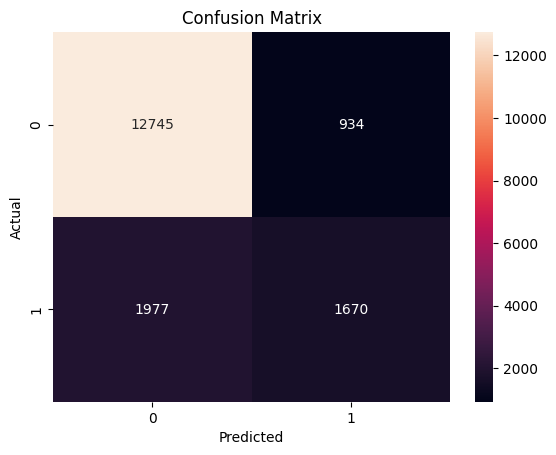

In [ ]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr=LogisticRegression(class_weight='balanced',solver='saga')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='saga')

In [ ]:
y_pred1=lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy*100)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Accuracy: 52.00854207549348
              precision    recall  f1-score   support

           0       0.81      0.51      0.63     13679
           1       0.23      0.55      0.33      3647

    accuracy                           0.52     17326
   macro avg       0.52      0.53      0.48     17326
weighted avg       0.69      0.52      0.56     17326

[[6987 6692]
 [1623 2024]]


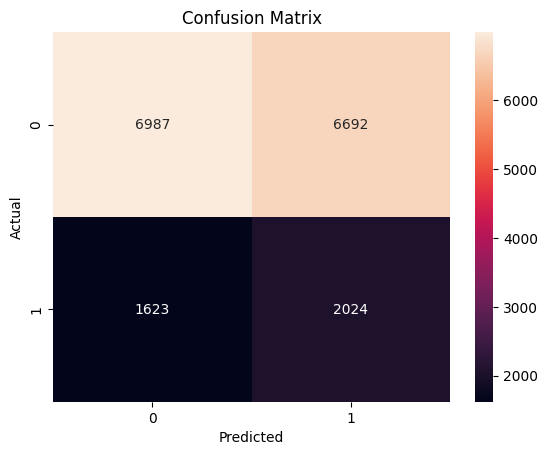

In [ ]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#svm
from sklearn.svm import SVC

In [ ]:
model=SVC(class_weight='balanced',random_state=7,kernel='linear')
model.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear', random_state=7)

In [ ]:
y_pred_svc=model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy*100)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Accuracy: 52.38947246912156
              precision    recall  f1-score   support

           0       0.80      0.52      0.64     13679
           1       0.23      0.52      0.32      3647

    accuracy                           0.52     17326
   macro avg       0.52      0.52      0.48     17326
weighted avg       0.68      0.52      0.57     17326

[[7179 6500]
 [1749 1898]]


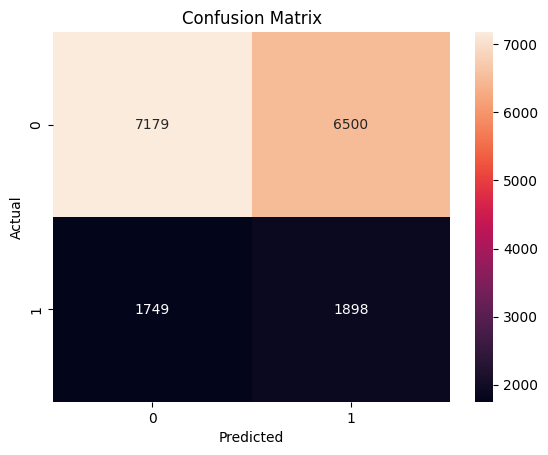

In [ ]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization

In [ ]:
df_groupby_sales = df2.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values(by='sales_quota_pct', ascending=False)
df_groupby_sales

,sales_quota_pct
recruiting_source,
Search Firm,1.103426
Applied Online,1.080959
Campus,1.076408
Referral,1.075538


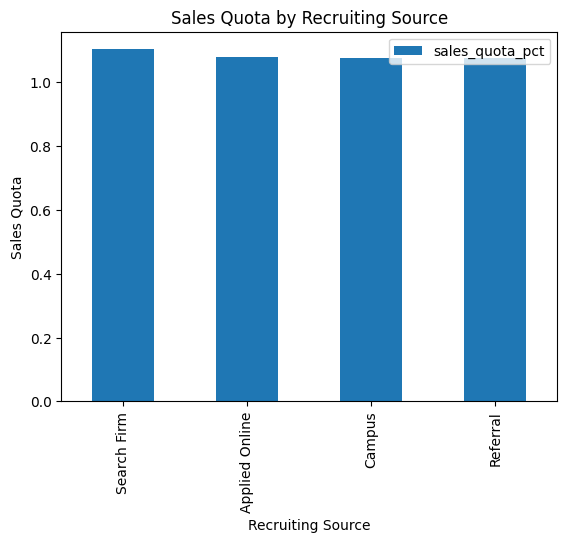

In [ ]:
df_groupby_sales.plot(kind='bar')
plt.ylabel('Sales Quota')
plt.xlabel('Recruiting Source')
plt.title('Sales Quota by Recruiting Source')
plt.show()

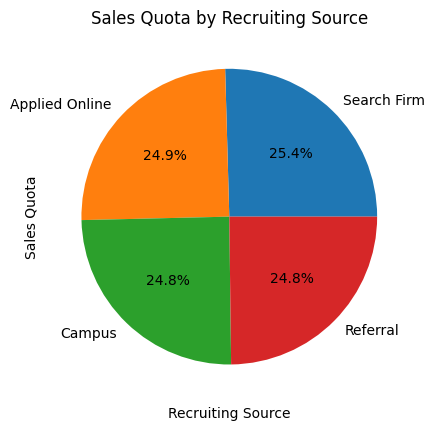

In [ ]:
df_groupby_sales.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend= False)
plt.ylabel('Sales Quota')
plt.xlabel('Recruiting Source')
plt.title('Sales Quota by Recruiting Source')
plt.show()

In [ ]:
df_groupby_performance_rating = df2.groupby('recruiting_source')[['performance_rating']].mean().sort_values(by='performance_rating', ascending=False)
df_groupby_performance_rating

,performance_rating
recruiting_source,
Referral,2.906395
Search Firm,2.897311
Campus,2.893206
Applied Online,2.891409


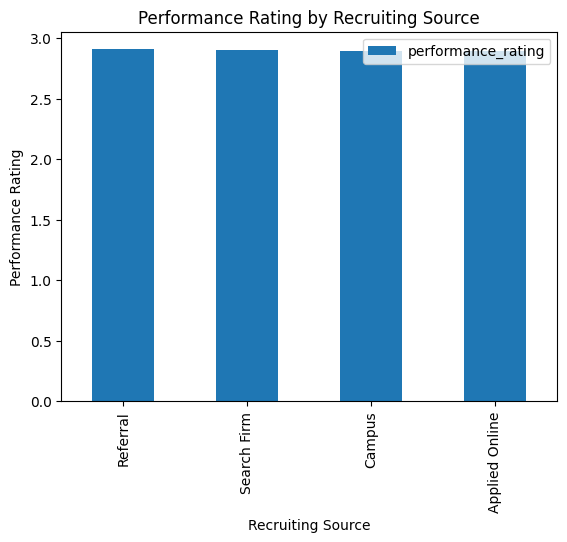

In [ ]:
df_groupby_performance_rating.plot(kind='bar')
plt.ylabel('Performance Rating')
plt.xlabel('Recruiting Source')
plt.title('Performance Rating by Recruiting Source')
plt.show()


Text(0.5, 1.0, 'Performance Rating by Recruiting Source')

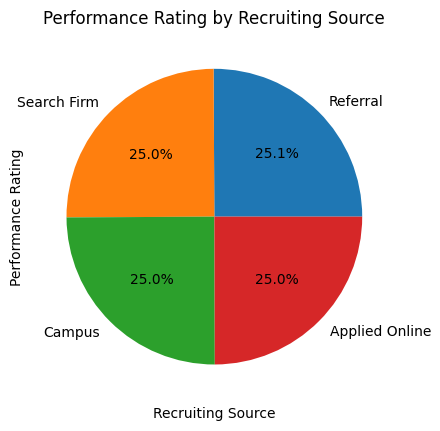

In [ ]:

df_groupby_performance_rating.plot(kind='pie', subplots=True,autopct='%1.1f%%',legend= False)
plt.ylabel('Performance Rating')
plt.xlabel('Recruiting Source')
plt.title('Performance Rating by Recruiting Source')

In [ ]:
df_groupby_attrition = df2.groupby('recruiting_source')[['attrition']].mean().sort_values(by='attrition', ascending=False)
df_groupby_attrition

,attrition
recruiting_source,
Campus,0.215109
Referral,0.214920
Applied Online,0.213370
Search Firm,0.208177


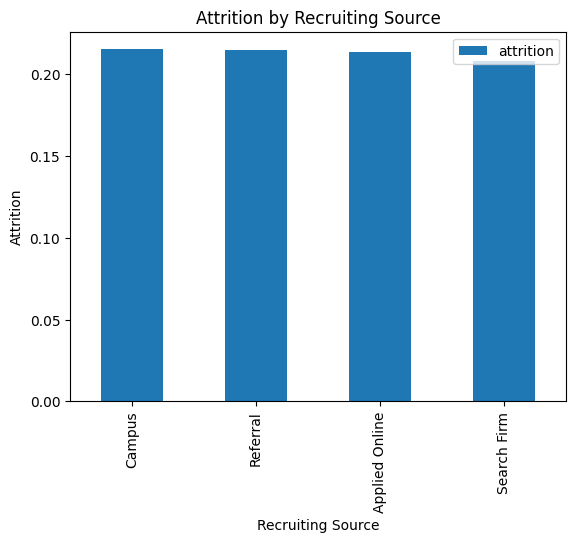

In [ ]:
df_groupby_attrition.plot(kind='bar')
plt.ylabel('Attrition')
plt.xlabel('Recruiting Source')
plt.title('Attrition by Recruiting Source')
plt.show()

Text(0.5, 1.0, 'Attrition by Recruiting Source')

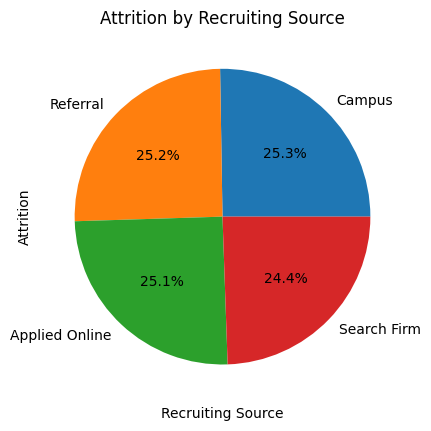

In [ ]:
df_groupby_attrition.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend= False)
plt.ylabel('Attrition')
plt.xlabel('Recruiting Source')
plt.title('Attrition by Recruiting Source')

# Visulaization using GGPLOT

In [ ]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line,geom_bar,geom_point,geom_histogram,geom_boxplot,geom_col,ggtitle

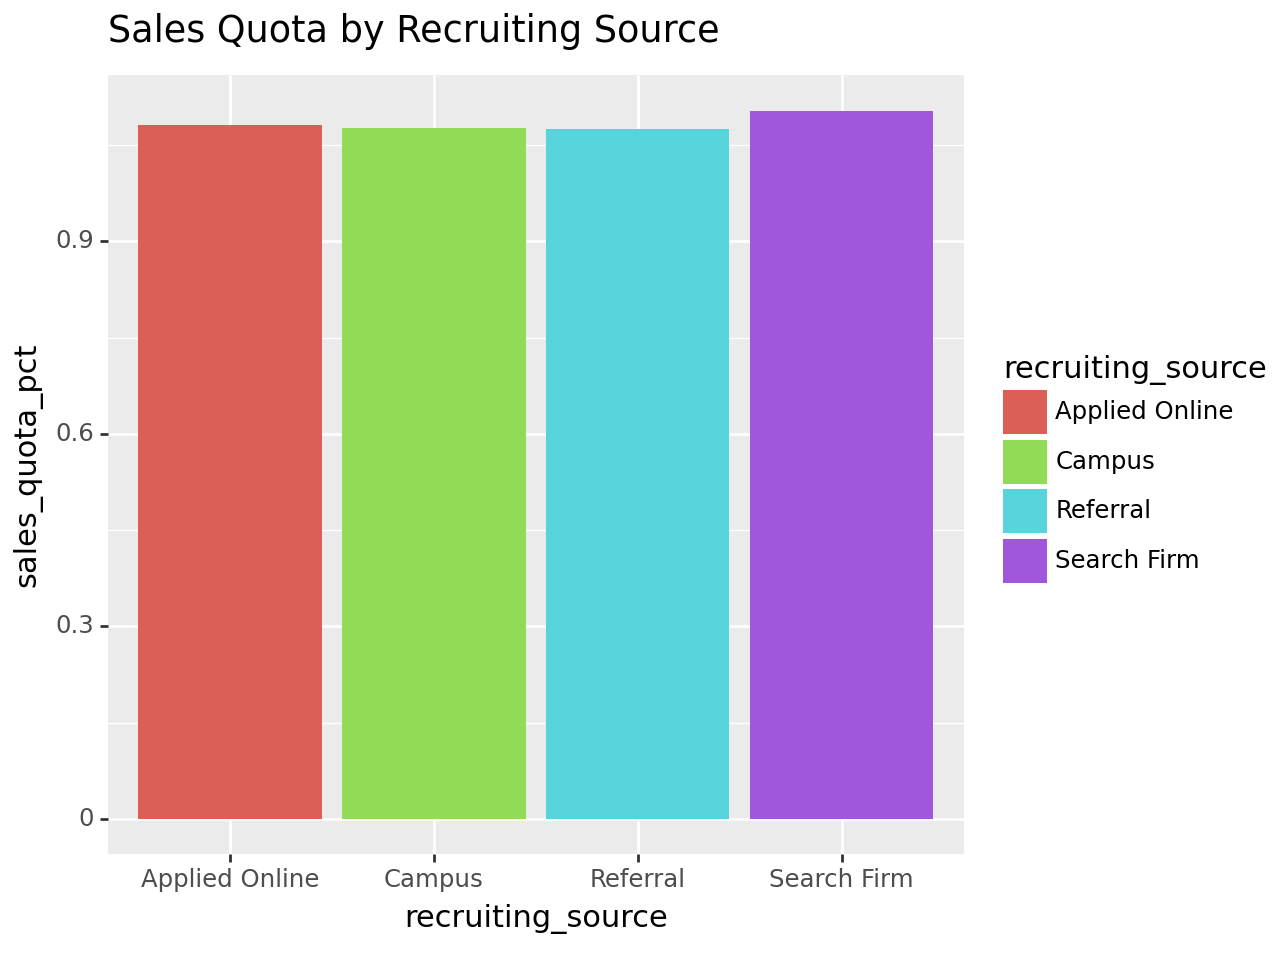

<Figure Size: (640 x 480)>

In [ ]:



(
    ggplot(df_groupby_sales.reset_index())
    + aes(x='recruiting_source', y='sales_quota_pct', fill='recruiting_source')
    + geom_col()
    + ggtitle('Sales Quota by Recruiting Source')

)


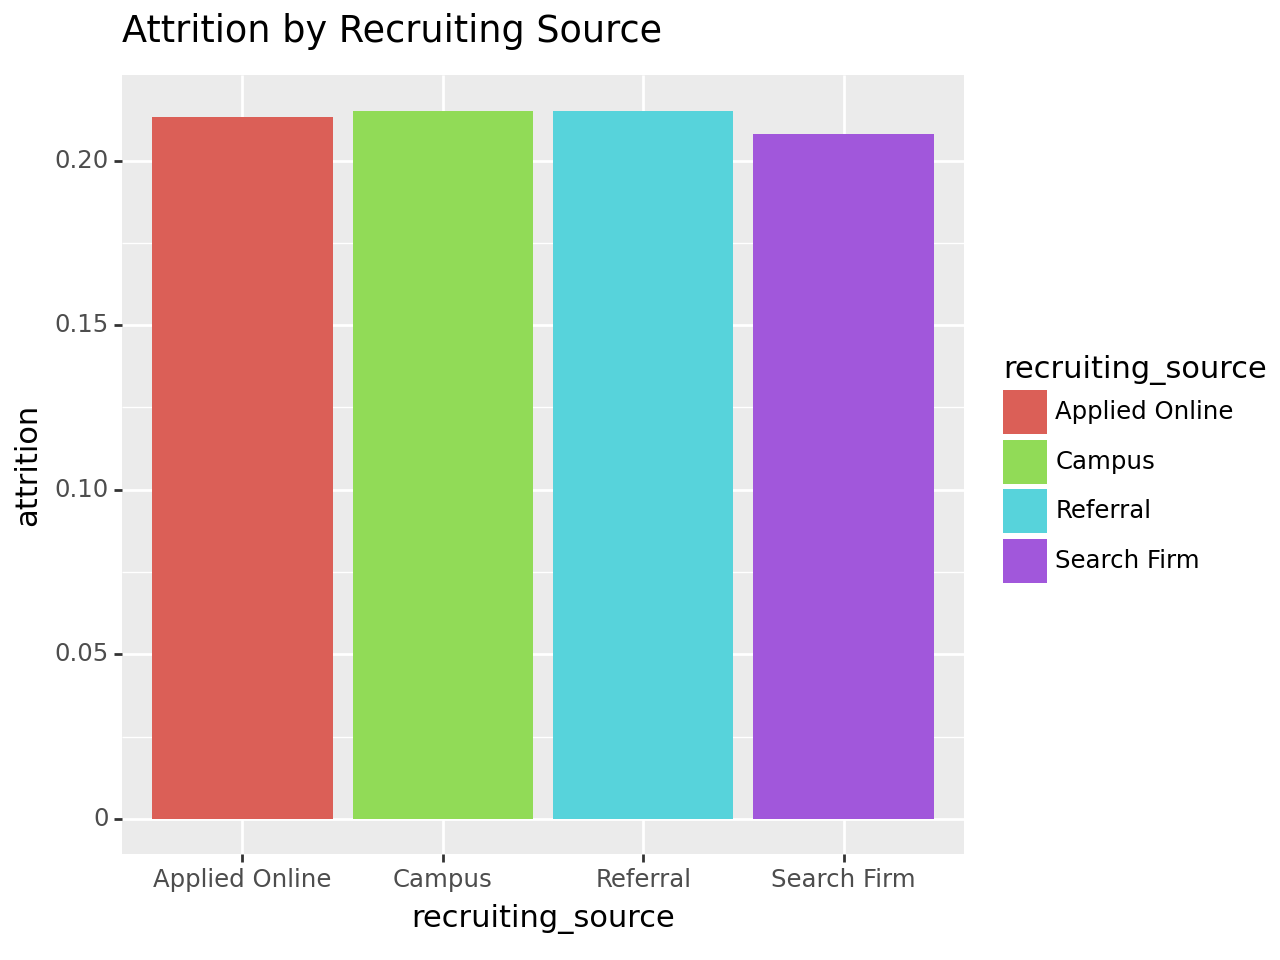

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(df_groupby_attrition.reset_index())
    + aes(x='recruiting_source', y='attrition', fill='recruiting_source')
    + geom_col()
    + ggtitle('Attrition by Recruiting Source')
)

In [ ]:
df2.to_csv('Recruitment_Data_cleaned_updated.csv')
!ls

Recruitment_Data_cleaned_updated.csv  Recruitment_Data_updated.csv  sample_data
